POLYGON ((50 176, 1064 176, 1064 1460, 50 1460, 50 176))


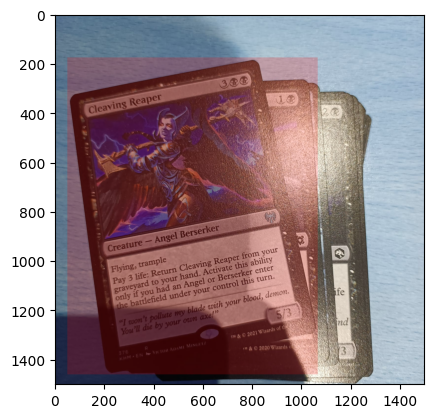

In [1]:
import os
import cv2
from shapely.geometry import Polygon

from src import utils
import src
from src.data.annotations.coco_annotations_manager import \
    CocoAnnotationsManager
from src.visualization.image_visualizer import show_image


ANNOTATIONS_PATH = os.path.join(utils.DATA_PATH, 'annotations', 'annotations.json')
CARD_IMAGES_PATH = os.path.join(utils.DATA_PATH, 'raw', 'templates')
IMAGE_NAME = '1.jpeg'

IMAGE_PATH = os.path.join('..', CARD_IMAGES_PATH, IMAGE_NAME)
IMAGE_PATH_RELATIVE_TO_DATA = os.path.join('raw', 'templates', IMAGE_NAME)
IMAGE = cv2.imread(IMAGE_PATH)

assert show_image(IMAGE)
annotations_manager = CocoAnnotationsManager(ANNOTATIONS_PATH)
bbox = annotations_manager.get_bbox_polygon(image_path=IMAGE_PATH_RELATIVE_TO_DATA)
assert show_image(IMAGE, bbox)
print(bbox)

POLYGON ((824 176, 1064 1288.0000000000005, 218 1460, 50 332, 824 176))


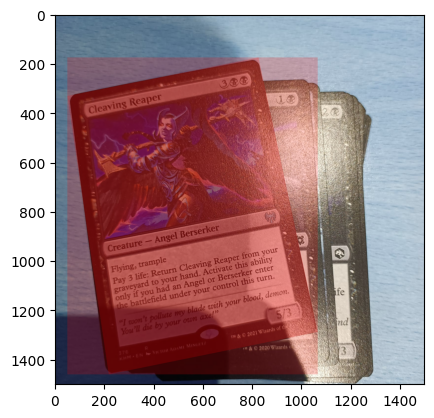

In [2]:
assert show_image(IMAGE)
annotations_manager = CocoAnnotationsManager(ANNOTATIONS_PATH)
bbox = annotations_manager.get_segmentation_polygon(image_path=IMAGE_PATH_RELATIVE_TO_DATA)
assert show_image(IMAGE, bbox)
print(bbox)